In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Markov Chain

Define a Markov chain according to the network structure, such that from each node a random
walker will jump to its neighbors with equal probability,   
i.e. $P = D^{−1}A$ where $D = diag(d_{i})$  
and $d_{i} = \sum _j A_{ij}$ 

In [2]:
import pickle
data = pickle.load(open('data/karate_cleaned.p','rb'))
matrix = data['matrix']

In [3]:
D = np.diag(np.sum(matrix,axis=1))
print D
# plt.figure(figsize=(15,10))
# sns.heatmap(D)


[[16  0  0 ...,  0  0  0]
 [ 0  9  0 ...,  0  0  0]
 [ 0  0 10 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  6  0  0]
 [ 0  0  0 ...,  0 12  0]
 [ 0  0  0 ...,  0  0 17]]


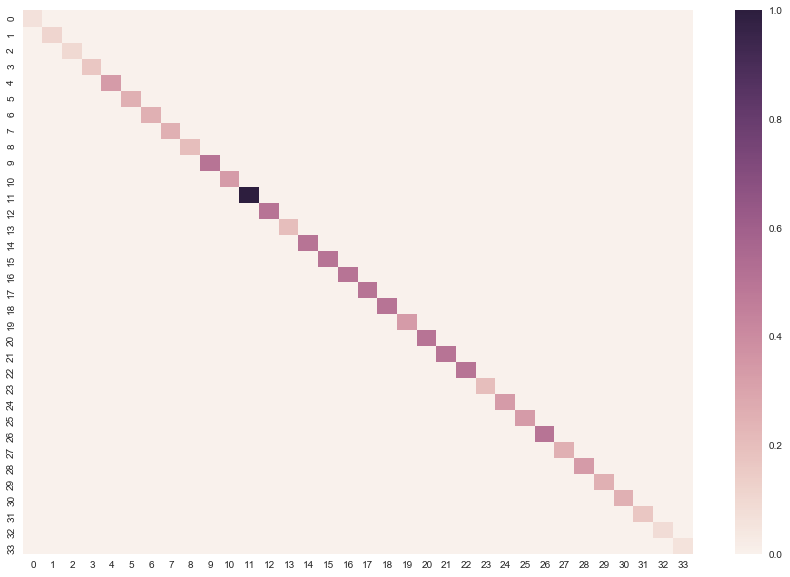

In [4]:
#Inverse of D
inv_D = np.diag(1./np.sum(matrix,axis=1))
inv_D
plt.figure(figsize=(15,10))
sns.heatmap(inv_D)

[[ 0.          0.0625      0.0625     ...,  0.0625      0.          0.        ]
 [ 0.11111111  0.          0.11111111 ...,  0.          0.          0.        ]
 [ 0.1         0.1         0.         ...,  0.          0.1         0.        ]
 ..., 
 [ 0.16666667  0.          0.         ...,  0.          0.16666667
   0.16666667]
 [ 0.          0.          0.08333333 ...,  0.08333333  0.          0.08333333]
 [ 0.          0.          0.         ...,  0.05882353  0.05882353  0.        ]]


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

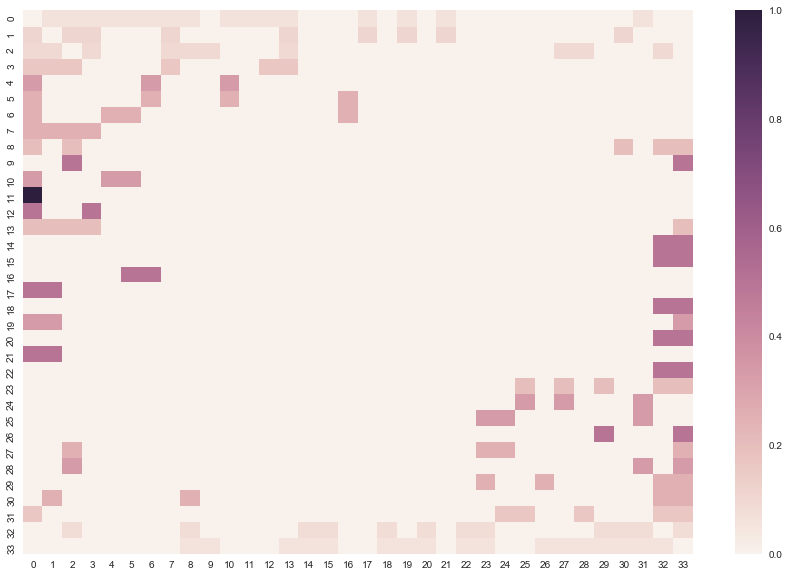

In [5]:
#P-1 * A
markov = np.dot(inv_D,matrix.T.astype(int))
print markov
plt.figure(figsize=(15,10))
sns.heatmap(markov)
np.sum(markov,axis=1)

### 2. Stationnary Distribution


In [6]:
from scipy.linalg import eig

S, U = eig(markov, right=False, left=True)
# print S
# print U

In [7]:
# Eigenvector corresponding to the eigenvalue 1
print np.abs(S - 1.)
np.argsort(np.abs(S - 1.))
# Position 0!

[  2.22044605e-15   1.32272329e-01   2.87048985e-01   3.87313233e-01
   1.71461135e+00   6.12230540e-01   6.48992947e-01   7.07208202e-01
   7.39957989e-01   7.70910617e-01   8.22942852e-01   8.64832945e-01
   9.06816002e-01   1.10538084e+00   1.15929996e+00   1.26802355e+00
   1.61190959e+00   1.56950660e+00   1.35177826e+00   1.49703011e+00
   1.39310454e+00   1.41691585e+00   1.44857938e+00   1.58333333e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00]


array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 25, 26, 30, 29, 28,
       27, 31, 33, 32, 24, 13, 14, 15, 18, 20, 21, 22, 19, 17, 23, 16,  4])

[  1.01397672e-01 +6.89362680e-35j   1.06033088e-01 +7.20877035e-35j
   5.64377133e-02 +3.83697696e-35j  -2.48518156e-02 -1.68957667e-35j
   6.70824090e-02 +4.56066772e-35j  -3.14610197e-02 -2.13891032e-35j
   9.25360867e-02 +6.29116262e-35j   8.71960729e-02 +5.92811619e-35j
  -1.32341389e-02 -8.99736770e-36j   2.45518792e-02 +1.66918518e-35j
   3.53665380e-02 +2.40443107e-35j   1.37913818e-01 +9.37621514e-35j
  -2.57672524e-02 -1.75181360e-35j  -4.38792098e-02 -2.98317396e-35j
   7.37469634e-02 +5.01376442e-35j   9.48252928e-02 +6.44679669e-35j
  -7.98334094e-03 -5.42755782e-36j   1.57915023e-01 +1.07360180e-34j
   1.08159668e-01 +7.35334816e-35j  -8.10489609e-04 -5.51019836e-37j
   9.98495614e-03 +6.78837684e-36j  -7.03069425e-02 -4.77989100e-35j
   6.51470283e-02 +4.42908884e-35j  -1.66975557e-17 -1.13520079e-50j
   6.77609930e-17 +4.60680196e-50j  -2.07255526e-17 -1.40904837e-50j
  -2.34924980e-17 -1.59716204e-50j  -2.09988063e-17 +1.31215822e-17j
  -2.09988063e-17 -1.31215822e-17j

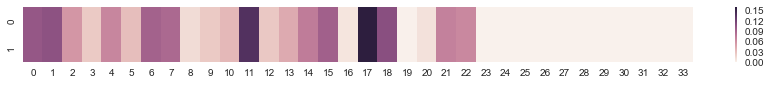

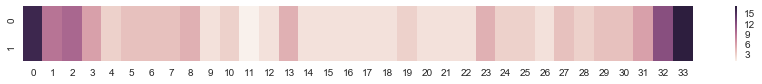

In [8]:
stationary = np.array(U[0])
stationary /= np.sum(stationary)
print stationary
print D

plt.figure(figsize=(15,1))
sns.heatmap([np.abs(stationary),np.abs(stationary)])

plt.figure(figsize=(15,1))
sns.heatmap([np.sum(matrix,axis=0),np.sum(matrix,axis=1)])

$\pi(i) \sim d_i$ ??  

Probably something wrong with my code...

### 3.

In [14]:
SOURCE_SET = 1
TARGER_SET = 34
REST = range(1,34)
print REST

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [15]:
n = markov.shape[0]
LMat = markov - np.diag(np.ones(n))

In [16]:
S,U = eig(LMat)
print S

[ -1.66533454e-16 +0.00000000e+00j  -1.32272329e-01 +0.00000000e+00j
  -2.87048985e-01 +0.00000000e+00j  -3.87313233e-01 +0.00000000e+00j
  -1.71461135e+00 +0.00000000e+00j  -6.12230540e-01 +0.00000000e+00j
  -6.48992947e-01 +0.00000000e+00j  -7.07208202e-01 +0.00000000e+00j
  -7.39957989e-01 +0.00000000e+00j  -7.70910617e-01 +0.00000000e+00j
  -8.22942852e-01 +0.00000000e+00j  -8.64832945e-01 +0.00000000e+00j
  -9.06816002e-01 +0.00000000e+00j  -1.10538084e+00 +0.00000000e+00j
  -1.15929996e+00 +0.00000000e+00j  -1.26802355e+00 +0.00000000e+00j
  -1.61190959e+00 +0.00000000e+00j  -1.56950660e+00 +0.00000000e+00j
  -1.35177826e+00 +0.00000000e+00j  -1.39310454e+00 +0.00000000e+00j
  -1.41691585e+00 +0.00000000e+00j  -1.44857938e+00 +0.00000000e+00j
  -1.49703011e+00 +0.00000000e+00j  -1.58333333e+00 +0.00000000e+00j
  -1.00000000e+00 +0.00000000e+00j  -1.00000000e+00 +0.00000000e+00j
  -1.00000000e+00 +0.00000000e+00j  -1.00000000e+00 +4.04039829e-16j
  -1.00000000e+00 -4.04039829e-16j

In [12]:
V = np.abs(S)
V

array([  1.66533454e-16,   1.32272329e-01,   2.87048985e-01,
         3.87313233e-01,   1.71461135e+00,   6.12230540e-01,
         6.48992947e-01,   7.07208202e-01,   7.39957989e-01,
         7.70910617e-01,   8.22942852e-01,   8.64832945e-01,
         9.06816002e-01,   1.10538084e+00,   1.15929996e+00,
         1.26802355e+00,   1.61190959e+00,   1.56950660e+00,
         1.35177826e+00,   1.39310454e+00,   1.41691585e+00,
         1.44857938e+00,   1.49703011e+00,   1.58333333e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00])

In [ ]:
#Local Minimum
for i in range(n):
    if all([(LMat[i][j]<=0 or V[j]<V[i]) for j in range(n)]):
        print i

In [ ]:
mfpt = np.zeros(n)
SourceSet = 11;
RemainSet = setdiff(1:N, SourceSet);
mfpt(RemainSet) = - LMat(RemainSet, RemainSet) \ ones(N-1, 1);

TransLMat = diag(EquiMeasure) * LMat * diag(1./EquiMeasure); 

SourceSet = SetA;
TargetSet = SetB;
RemainSet = setdiff(1:N, union(SourceSet, TargetSet));

% Initialization of Committor function: transition probability of reaching
% the target set before returning to the source set.
CommitAB = zeros(N, 1);
CommitAB(SourceSet) = zeros(size(SourceSet));
CommitAB(TargetSet) = ones(size(TargetSet));

LMatRestrict = LMat(RemainSet, RemainSet);
RightHandSide = - LMat(RemainSet, TargetSet) * CommitAB(TargetSet);

% Solve the Dirchelet Boundary problem
CommitAB(RemainSet) = LMatRestrict \ RightHandSide;

% Clustering into two basins according to the transition probability 
ClusterA = find(CommitAB <= 0.5);
ClusterB = find(CommitAB > 0.5);

% The inverse transition probability (committor function)
CommitBA = zeros(N, 1);
CommitBA(SourceSet) = ones(size(SourceSet));
CommitBA(TargetSet) = zeros(size(TargetSet));

LMatRestrict = LMat(RemainSet, RemainSet);
RightHandSide = - LMat(RemainSet, SourceSet) * CommitBA(SourceSet);

% Dirichelet Boundary Problem with inverse transition probability
CommitBA(RemainSet) = LMatRestrict \ RightHandSide;

RhoAB = EquiMeasure .* CommitAB .* CommitBA;

% Current or Flux on edges
CurrentAB = diag(EquiMeasure .* CommitBA) * LMat * diag(CommitAB);
CurrentAB = CurrentAB - diag(diag(CurrentAB));

% Effective Current Flux
EffCurrentAB = max(CurrentAB - CurrentAB', 0);

% Transition Current or Flux on each node
TransCurrent = zeros(N, 1);
TransCurrent(ClusterA) = sum(EffCurrentAB(ClusterA, ClusterB), 2);
TransCurrent(ClusterB) = sum(EffCurrentAB(ClusterA, ClusterB), 1);

In [ ]:
# Matlab

% Transition Path Analysis for Karate Club network
%
%   Reference:
%       Weinan E, Jianfeng Lu, and Yuan Yao (2013) 
%       The Landscape of Complex Networks: Critical Nodes and A Hierarchical Decomposition. 
%       Methods and Applications of Analysis, special issue in honor of Professor Stanley Osher on his 70th birthday, 20(4):383-404, 2013.

% load the Adjacency matrix of Karate Club network
%   replace it by your own data
load karate_rand1.mat A

D = sum(A, 2);
N = length(D);
Label = [0:N-1];
TransProb = diag(1./D) * A;
LMat = TransProb - diag(ones(N, 1));

% source set A contains the coach
% target set B contains the president 
SetA = 1; % [44:54];%[find(ind==19)];%[44:54];%18 + 1;
SetB = 34; %[find(ind==11)];%10 + 1; % seems to be 11 instead of 10

[EigV, EigD] = eig(LMat');
EquiMeasure = EigV(:, 1)./sign(EigV(1,1));

for i = 1:N
  localmin = true;
  for j = setdiff(1:N, i)
    if ((LMat(i,j)>0)&(EquiMeasure(j)>EquiMeasure(i))) 
      localmin = false;
      break
    end
  end
  if (localmin)
    i
  end
end

mfpt = zeros(N, 1);
SourceSet = 11;
RemainSet = setdiff(1:N, SourceSet);
mfpt(RemainSet) = - LMat(RemainSet, RemainSet) \ ones(N-1, 1);

TransLMat = diag(EquiMeasure) * LMat * diag(1./EquiMeasure); 

SourceSet = SetA;
TargetSet = SetB;
RemainSet = setdiff(1:N, union(SourceSet, TargetSet));

% Initialization of Committor function: transition probability of reaching
% the target set before returning to the source set.
CommitAB = zeros(N, 1);
CommitAB(SourceSet) = zeros(size(SourceSet));
CommitAB(TargetSet) = ones(size(TargetSet));

LMatRestrict = LMat(RemainSet, RemainSet);
RightHandSide = - LMat(RemainSet, TargetSet) * CommitAB(TargetSet);

% Solve the Dirchelet Boundary problem
CommitAB(RemainSet) = LMatRestrict \ RightHandSide;

% Clustering into two basins according to the transition probability 
ClusterA = find(CommitAB <= 0.5);
ClusterB = find(CommitAB > 0.5);

% The inverse transition probability (committor function)
CommitBA = zeros(N, 1);
CommitBA(SourceSet) = ones(size(SourceSet));
CommitBA(TargetSet) = zeros(size(TargetSet));

LMatRestrict = LMat(RemainSet, RemainSet);
RightHandSide = - LMat(RemainSet, SourceSet) * CommitBA(SourceSet);

% Dirichelet Boundary Problem with inverse transition probability
CommitBA(RemainSet) = LMatRestrict \ RightHandSide;

RhoAB = EquiMeasure .* CommitAB .* CommitBA;

% Current or Flux on edges
CurrentAB = diag(EquiMeasure .* CommitBA) * LMat * diag(CommitAB);
CurrentAB = CurrentAB - diag(diag(CurrentAB));

% Effective Current Flux
EffCurrentAB = max(CurrentAB - CurrentAB', 0);

% Transition Current or Flux on each node
TransCurrent = zeros(N, 1);
TransCurrent(ClusterA) = sum(EffCurrentAB(ClusterA, ClusterB), 2);
TransCurrent(ClusterB) = sum(EffCurrentAB(ClusterA, ClusterB), 1);